# Uncertainties in Maximum Likelihood Method
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Define log-likelihood for the outcome of the experiment

Mean and sigma from 10 measurements

In [2]:
Np = 10
x0 = 1
sigma0 = 2


def myll(mu, sig):
    s2 = sig**2
    val = -Np / 2 / s2 * (sigma0**2 + (mu - x0) ** 2) - Np / 2 * np.log(
        2 * np.pi * s2
    )

    return val

### (2) Define point grid

In [3]:
# Grid for mean

Xmin = -2
Xmax = 4
dX = 0.1

Xrange = np.arange(Xmin, Xmax, dX)

# Grid for sigma

Smin = 0.8
Smax = 5.2
dS = 0.05

Srange = np.arange(Smin, Smax, dS)

In [4]:
# 2D grid

Sgrid, Xgrid = np.meshgrid(Srange, Xrange)

Nx = Xrange.size
Ns = Srange.size
ND = Nx * Ns

LLval = np.empty(Xgrid.shape)

# Loop over 2D grid

for i in range(Nx):
    for j in range(Ns):
        x = Xgrid[i, j]
        s = Sgrid[i, j]

        LLval[i, j] = myll(x, s)

### (3) Plot results

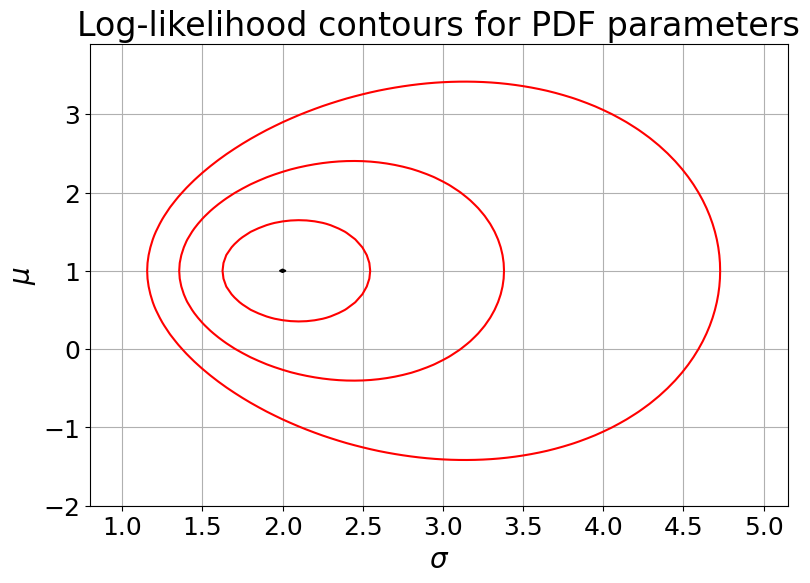

In [5]:
# Create result graph

LLmax = np.max(LLval)

plt.figure(figsize=(9, 6))

plt.contour(
    Sgrid,
    Xgrid,
    LLval,
    levels=[LLmax - 4.5, LLmax - 2.0, LLmax - 0.5, LLmax - 0.002],
    colors=["#FF0000", "#FF0000", "#FF0000", "#000000"],
)

plt.title("Log-likelihood contours for PDF parameters", size=24)
plt.xlabel("$\sigma$", size=20)
plt.ylabel("$\mu$", size=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(which="major", axis="both")

fname = "06_mlm_func.png"
plt.savefig(fname)

plt.show()